Diamonds: Analyze diamonds by their cut, color, clarity, price, and other attributes

Index counter carat - Carat weight of the diamond 
cut - Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal 
color - Color of the diamond, with D being the best and J the worst 
clarity - How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 
depth - depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter 
table - table%: The width of the diamond's table expressed as a percentage of its average diameter price - the price of the diamond x - length mm y - width mm z - depth mm

Homework: Do a correlation and regression of your assigned group dataset. This is an individual assignment!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [5]:
location= 'Diamonds.csv'
dfDiamondsA = pd.read_csv('Diamonds.csv')

In [8]:
dfDiamondsA.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [9]:
dfDiamondsA.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Previous class exercise:
Analysis of the Diamonds data set is here: XXXXXXXXX

The question: It is clear that size and quality are drives of price. However it comes down to which of the 9 attribute attribute does influence price the most?

From the series graphs we know the best color,clarity, and cut diamons are the most expensive regardless of size if compared to low quality ones. These high quality diamonds are small, expensive, and were not that popular in the data set.

The best graph that shows the main driver of price is the "lmplot col" it allows you to compare the main attributes (cut, color, and clarity) under the same conditions (carat vs price). 
The graph with the highest slope is the main driver of price. Based on the data set; Clarity is the main driver of price followed by color, and then cut.

C:\Users\EDM115\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


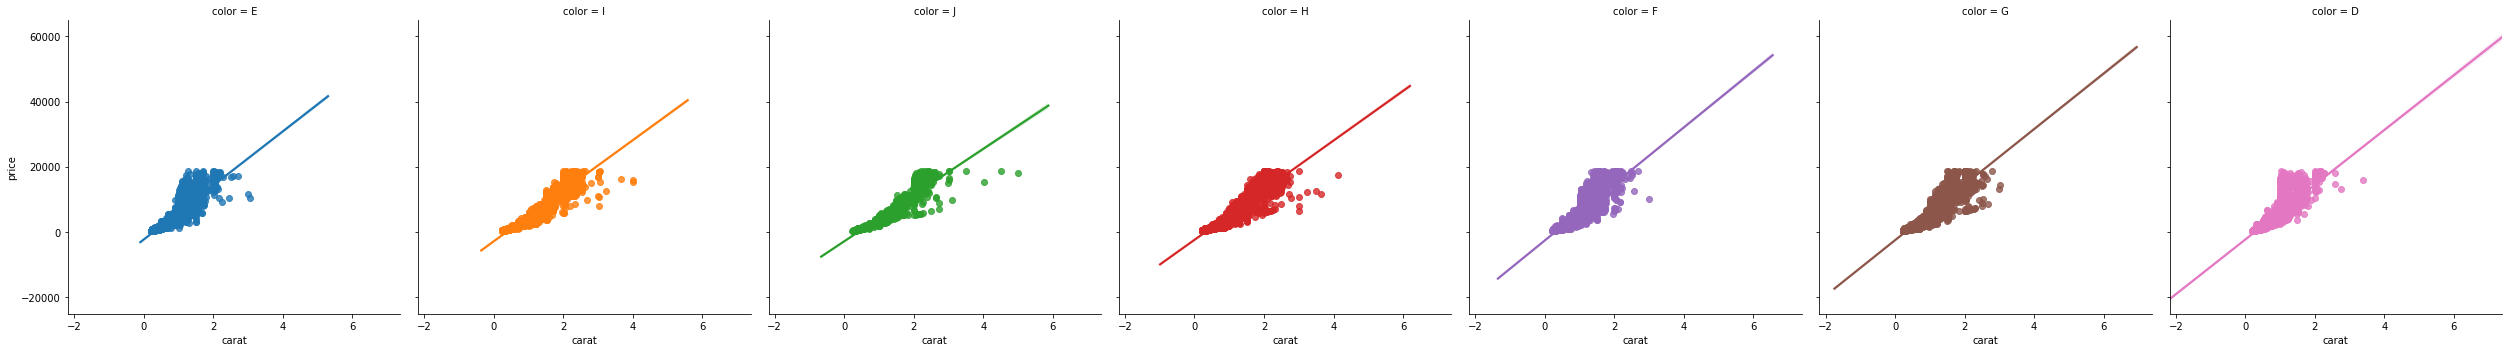

In [11]:
sns.lmplot (x= 'carat', y='price',data= dfDiamondsA, col='color', fit_reg= True, hue='color')

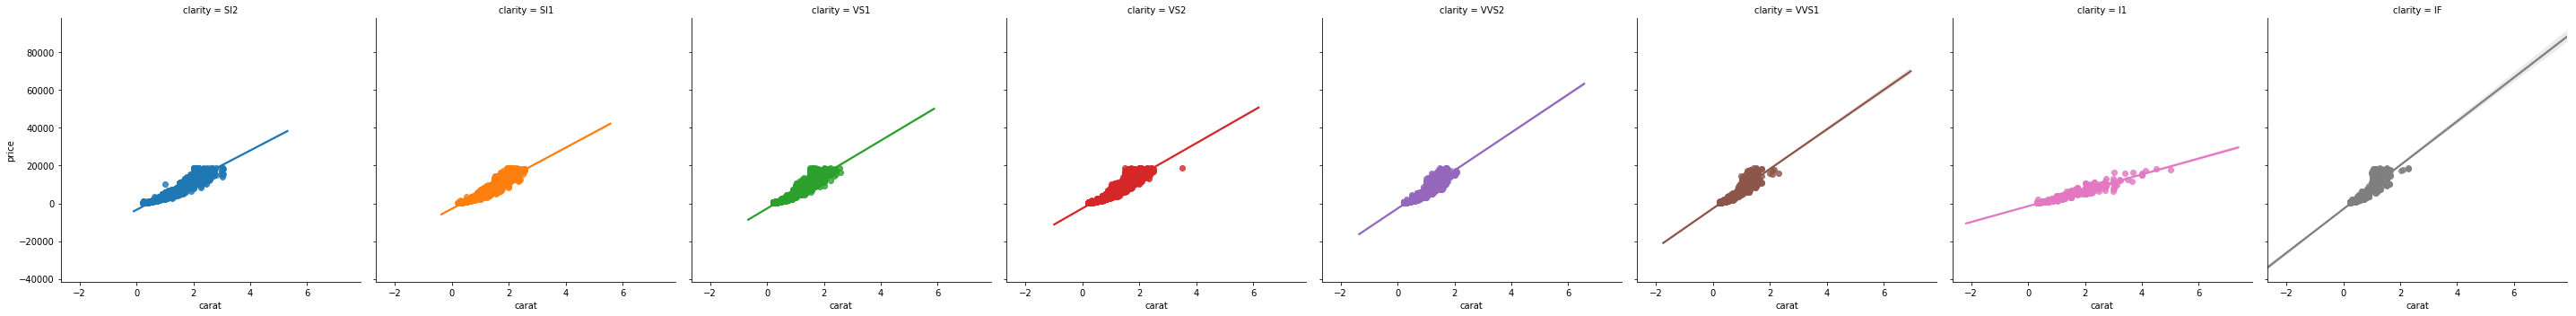

In [12]:
sns.lmplot (x= 'carat', y='price',data= dfDiamondsA, col='clarity', fit_reg= True, hue='clarity')

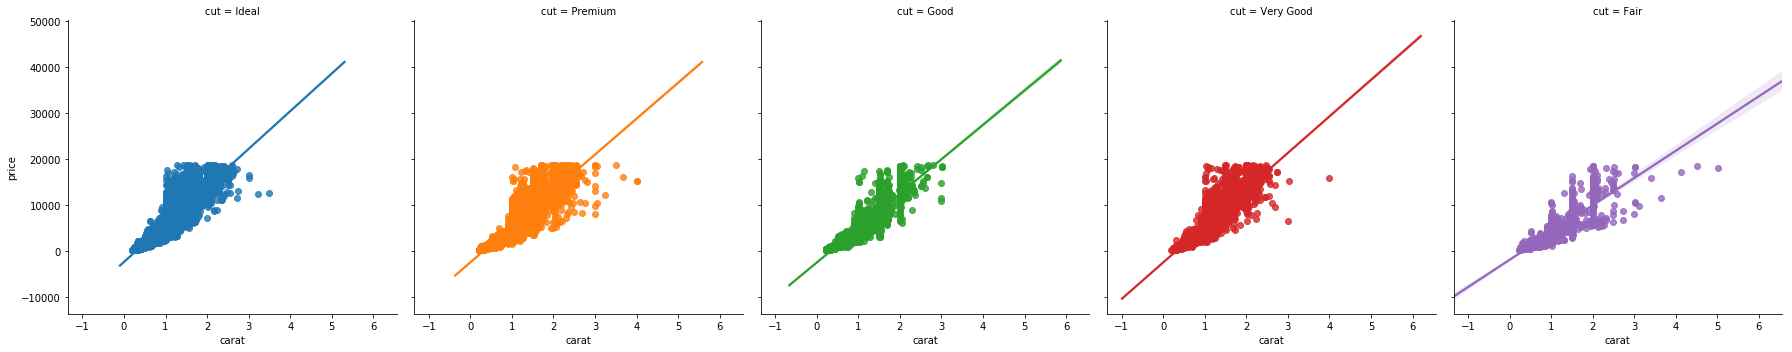

In [13]:
sns.lmplot (x= 'carat', y='price',data= dfDiamondsA, col='cut', fit_reg= True, hue='cut')

In [14]:
dfDiamondsA.corr()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text xticklabel objects>)

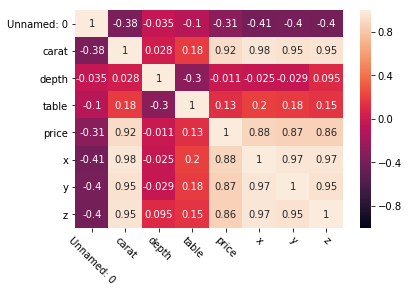

In [16]:
corr= dfDiamondsA.corr()
sns.heatmap (corr, vmin=-1, annot= True)
plt.xticks(rotation=-45)

In [17]:
dfDiamondsB = dfDiamondsA.drop(['Unnamed: 0','depth','table'], axis=1)
dfDiamondsB.head()


,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

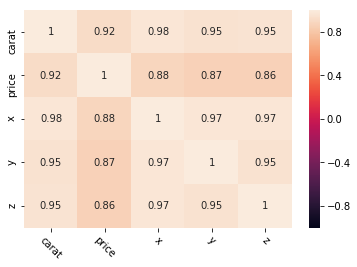

In [18]:
corr= dfDiamondsB.corr()
sns.heatmap (corr, vmin=-1, annot= True)
plt.xticks(rotation=-45)

From the heatmap; carat is the attribute with the highest correlation with price

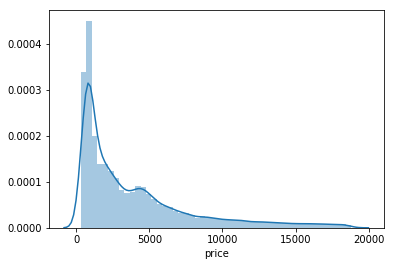

In [19]:
sns.distplot(dfDiamondsB["price"])


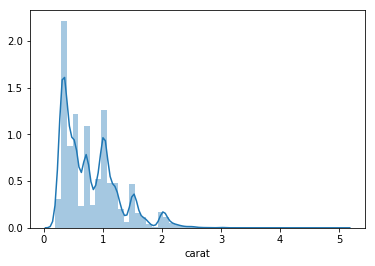

In [20]:
sns.distplot(dfDiamondsB["carat"])

Finding a representative sample to re-run corr and reg

In [40]:

dfDiamondsB[dfDiamondsB.price <= 5000].count()


carat      39226
cut        39226
color      39226
clarity    39226
price      39226
x          39226
y          39226
z          39226
dtype: int64

In [42]:
dfDiamondsB[dfDiamondsB.price >= 5000].count()

carat      14727
cut        14727
color      14727
clarity    14727
price      14727
x          14727
y          14727
z          14727
dtype: int64

In [47]:
dfDiamondsB[(dfDiamondsB.price >= 10000) & (dfDiamondsB.carat>=1)].count()

carat      5223
cut        5223
color      5223
clarity    5223
price      5223
x          5223
y          5223
z          5223
dtype: int64

In [44]:
dfDiamondsB[(dfDiamondsB.carat<1)].count()

carat      34880
cut        34880
color      34880
clarity    34880
price      34880
x          34880
y          34880
z          34880
dtype: int64

In [30]:
dfDiamondsB[(dfDiamondsB.price >= 10000) & (dfDiamondsB.clarity =='IF')].count()

carat      168
cut        168
color      168
clarity    168
price      168
x          168
y          168
z          168
dtype: int64

In [31]:
dfDiamondsB[(dfDiamondsB.price >= 10000) & (dfDiamondsB.clarity =='IF') & (dfDiamondsB.cut =='Ideal')].count()

carat      80
cut        80
color      80
clarity    80
price      80
x          80
y          80
z          80
dtype: int64

In [32]:
dfDiamondsB[(dfDiamondsB.price >= 10000) & (dfDiamondsB.clarity =='IF') & (dfDiamondsB.cut =='Ideal')& (dfDiamondsB.color =='D')].count()

carat      7
cut        7
color      7
clarity    7
price      7
x          7
y          7
z          7
dtype: int64

In [45]:
dfDiamondsB[(dfDiamondsB.price >= 0) & (dfDiamondsB.clarity =='IF') & (dfDiamondsB.cut =='Ideal')& 
            (dfDiamondsB.color =='D')].count()

carat      28
cut        28
color      28
clarity    28
price      28
x          28
y          28
z          28
dtype: int64

In [35]:
dfDiamondsB[(dfDiamondsB.price <= 10000) & (dfDiamondsB.clarity =='IF') & (dfDiamondsB.cut =='Ideal')& 
            (dfDiamondsB.color =='D')].count()

carat      21
cut        21
color      21
clarity    21
price      21
x          21
y          21
z          21
dtype: int64

In [36]:
dfDiamondsB[(dfDiamondsB.clarity =='IF') & (dfDiamondsB.cut =='Ideal')& 
            (dfDiamondsB.color =='D')].count()

carat      28
cut        28
color      28
clarity    28
price      28
x          28
y          28
z          28
dtype: int64

Since clarity seems to be the biggest driver of price (based on previous exercise); lets find all best 'clarity' quality diamons. Correlation should be higher than picking a sample with all best cuts or color.

In [38]:
bestClarityDiamonds = ['IF', 'VVS1', 'VVS2']
dfDiamondsB[dfDiamondsB.clarity.isin(bestClarityDiamonds)]

,carat,cut,color,clarity,price,x,y,z
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,336,3.95,3.98,2.47
25,0.23,Very Good,G,VVS2,354,3.97,4.01,2.41
65,0.28,Ideal,G,VVS2,553,4.19,4.22,2.58
66,0.32,Ideal,I,VVS1,553,4.39,4.42,2.73
69,0.24,Premium,E,VVS1,553,4.01,4.03,2.44
70,0.24,Very Good,D,VVS1,553,3.97,4.00,2.45
75,0.26,Very Good,F,VVS2,554,4.19,4.22,2.49
76,0.26,Very Good,E,VVS2,554,4.15,4.23,2.51
77,0.26,Very Good,D,VVS2,554,4.08,4.13,2.56


In [39]:
dfDiamondsB[dfDiamondsB.clarity.isin(bestClarityDiamonds)].count()

carat      10511
cut        10511
color      10511
clarity    10511
price      10511
x          10511
y          10511
z          10511
dtype: int64

In [48]:
dfDiamondsClarity = dfDiamondsB[dfDiamondsB.clarity.isin(bestClarityDiamonds)]

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

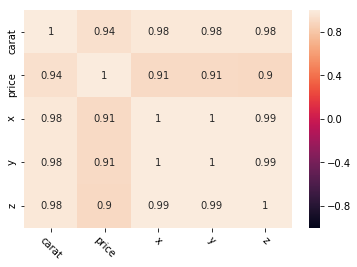

In [49]:
corrClarity= dfDiamondsClarity.corr()
sns.heatmap (corrClarity, vmin=-1, annot= True)
plt.xticks(rotation=-45)

In [51]:
import statsmodels.formula.api as smf

In [53]:
result = smf.ols('price ~ carat + x + y + z', data=dfDiamondsClarity).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 2.216e+04
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:21:50   Log-Likelihood:                -89457.
No. Observations:               10511   AIC:                         1.789e+05
Df Residuals:                   10506   BIC:                         1.790e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4875.6509    254.660     19.146      0.000    4376.469    5374.833
carat        1.61e+04    193.873     83.045      0.000    1.57e+04    1.65e+04
x          -1231.0856    284.041     -4.334      0.000   -1787.860    -674.311
y            836.9301    280.141      2.988      0.003     287.800    1386.060
z          -2792.7385    192.890    -14.478      0.000   -3170.840   -2414.637
==============================================================================
Omnibus:                     3641.932   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75744.377
Skew:                           1.154   Prob(JB):                         0.00
Kurtosis:                      15.947   Cond. No.                         268.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
result = smf.ols(formula='price ~ carat + x + y + z - 1', data=dfDiamondsClarity).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.659e+04
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:24:42   Log-Likelihood:                -89637.
No. Observations:               10511   AIC:                         1.793e+05
Df Residuals:                   10507   BIC:                         1.793e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       1.252e+04     51.164    244.618      0.000    1.24e+04    1.26e+04
x           -743.4653    287.776     -2.583      0.010   -1307.561    -179.369
y           1114.6791    284.590      3.917      0.000     556.828    1672.530
z          -1857.8666    189.826     -9.787      0.000   -2229.962   -1485.771
==============================================================================
Omnibus:                     3513.553   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50116.563
Skew:                           1.206   Prob(JB):                         0.00
Kurtosis:                      13.422   Cond. No.                         266.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
result = smf.ols(formula='price ~ carat  - 1', data=dfDiamondsClarity).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 5.451e+04
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:32:56   Log-Likelihood:                -94267.
No. Observations:               10511   AIC:                         1.885e+05
Df Residuals:                   10510   BIC:                         1.885e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       6731.3088     28.831    233.473      0.000    6674.794    6787.823
==============================================================================
Omnibus:                     6080.023   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45471.171
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      11.535   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\EDM115\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


AttributeError: module 'seaborn' has no attribute 'plt'

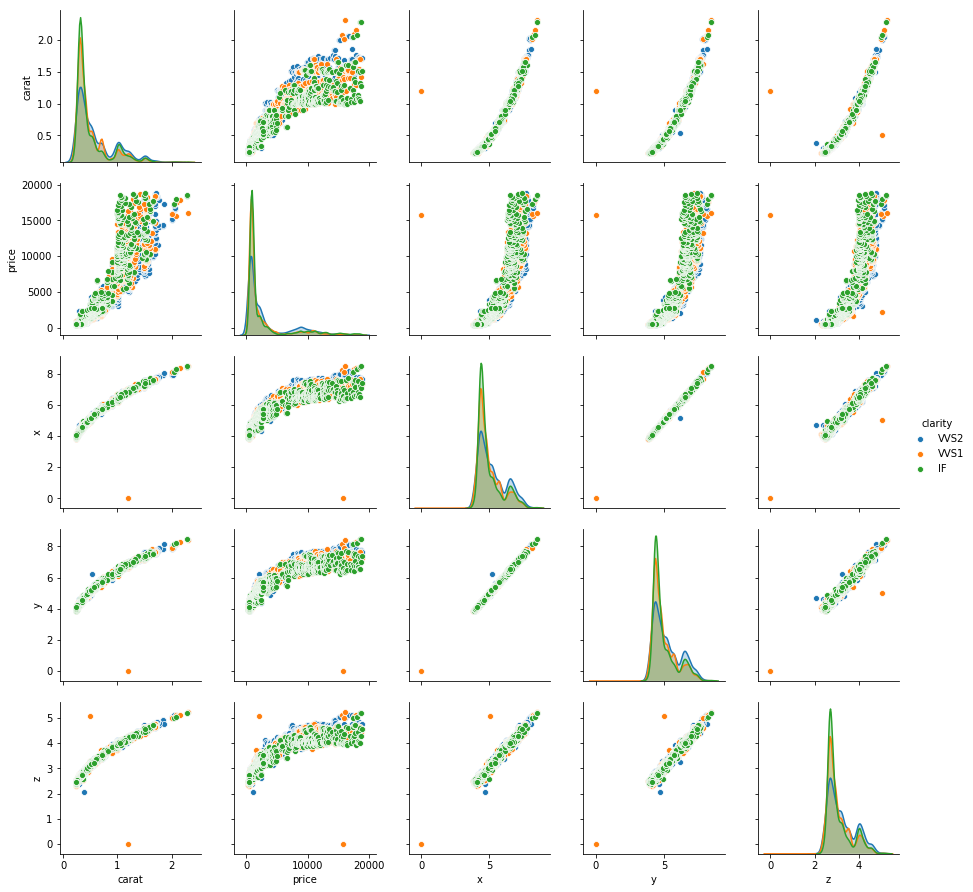

In [57]:
sns.pairplot(dfDiamondsClarity, hue='clarity', size= 2.5)
sns.plt.show()


Finding a sample will all best cut diamonds. It is expected that corr is lower.However, there is a biger sample so that may help to improve corr results. 

In [58]:
bestCutDiamonds = ['Ideal', 'Premium', 'Very Good']
dfDiamondsB[dfDiamondsB.cut.isin(bestCutDiamonds)]

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,338,4.00,4.05,2.39
11,0.23,Ideal,J,VS1,340,3.93,3.90,2.46
12,0.22,Premium,F,SI1,342,3.88,3.84,2.33
13,0.31,Ideal,J,SI2,344,4.35,4.37,2.71


In [60]:
dfDiamondsB[dfDiamondsB.cut.isin(bestCutDiamonds)].count()

carat      47424
cut        47424
color      47424
clarity    47424
price      47424
x          47424
y          47424
z          47424
dtype: int64

In [61]:
dfDiamondsCut= dfDiamondsB[dfDiamondsB.cut.isin(bestCutDiamonds)]

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

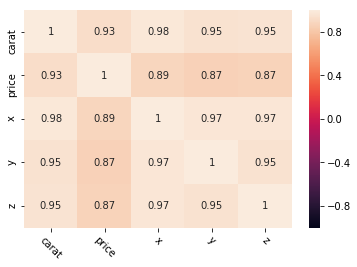

In [62]:
corrCut = dfDiamondsCut.corr()
sns.heatmap (corrCut, vmin= -1, annot=True)
plt.xticks(rotation =-45)

In [64]:
result = smf.ols('price ~ carat + x + y + z', data=dfDiamondsCut).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 7.763e+04
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:55:41   Log-Likelihood:            -4.1309e+05
No. Observations:               47424   AIC:                         8.262e+05
Df Residuals:                   47419   BIC:                         8.262e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3112.9768    110.558     28.157      0.000    2896.281    3329.672
carat        1.12e+04     67.761    165.246      0.000    1.11e+04    1.13e+04
x          -1373.0712     42.179    -32.553      0.000   -1455.743   -1290.399
y             58.5424     25.100      2.332      0.020       9.345     107.739
z           -136.4754     41.296     -3.305      0.001    -217.417     -55.534
==============================================================================
Omnibus:                    14299.713   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           267729.524
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                      14.475   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
result = smf.ols(formula='price ~ carat + x + y + z - 1', data=dfDiamondsCut).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 1.593e+05
Date:                Fri, 08 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:54:56   Log-Likelihood:            -4.1348e+05
No. Observations:               47424   AIC:                         8.270e+05
Df Residuals:                   47420   BIC:                         8.270e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9386.2385     21.494    436.685      0.000    9344.109    9428.368
x           -659.1422     33.988    -19.393      0.000    -725.759    -592.525
y             78.0972     25.299      3.087      0.002      28.510     127.684
z            -40.0164     41.496     -0.964      0.335    -121.349      41.316
==============================================================================
Omnibus:                    13763.319   Durbin-Watson:                   1.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167823.310
Skew:                           1.049   Prob(JB):                         0.00
Kurtosis:                      11.974   Cond. No.                         65.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

Main driver of prince for Diamonds is the Clarity attribute.

The size of the sample affect the corr/ regression values. Regarding the two scenarios: Clarity scenario showed higher OLG regresion values than those in the Cut scenario despite having a smaller sample so that price is highly correlated to clarity.

Do not let the size of the stones overshadow what is most valuable CLARITY!!!!